# References
- Steven Buechler, "Study of Height vs Weight", from the "Computing with Data" seminar (https://www3.nd.edu/~steve/computing_with_data/2_Motivation/motivate_ht_wt.html)
- Drew Conway and John Myles White, "Height vs Weight" dataset from the "Machine-Learning for Hackers" textbook

In [28]:
# import python packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression


plt.rcParams['figure.figsize'] =(8,6)

# load data
data = pd.read_csv("height_vs_weight_data.csv")

# Understand the data structure
- Identify the table columns
- Identify the size of this dataset

In [6]:
# examine data structure
# show 10 random samples
data.sample(10)

,Gender,Weight,Height
6601,Female,62.830919,142.564695
6728,Female,63.565374,134.800715
4986,Male,71.644419,190.063286
9805,Female,64.174279,135.131331
7040,Female,68.178658,144.333579
4047,Male,69.039522,192.092449
5771,Female,66.788822,152.410699
1135,Male,68.850152,187.578704
2895,Male,71.382577,205.545795
7262,Female,57.072656,93.746142


# Examine the data distribution
## Height distribution by gender

<AxesSubplot:xlabel='Height', ylabel='Count'>

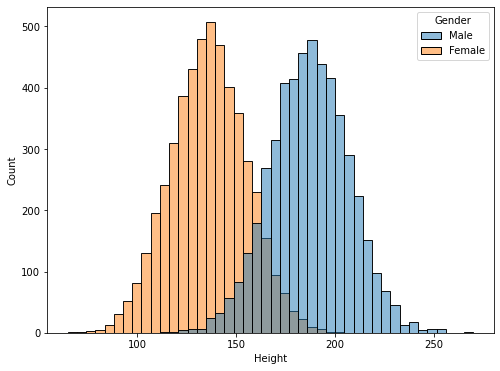

In [7]:
sns.histplot(data=data, x="Height", hue="Gender")

In [8]:
average_male_height = data.query("Gender=='Male'")["Height"].mean()
average_female_height = data.query("Gender=='Female'")["Height"].mean()

print(f"""The average height for:
male:   {average_male_height:.2f} cm, 
female: {average_female_height:.2f} cm""")

The average height for:
male:   187.02 cm, 
female: 135.86 cm


## Weight distribution by gender
- Replace the "__" in the following codes with a proper column names
- **Question**: What is the average body weight for the male and female participants in this dataset?

<AxesSubplot:xlabel='Weight', ylabel='Count'>

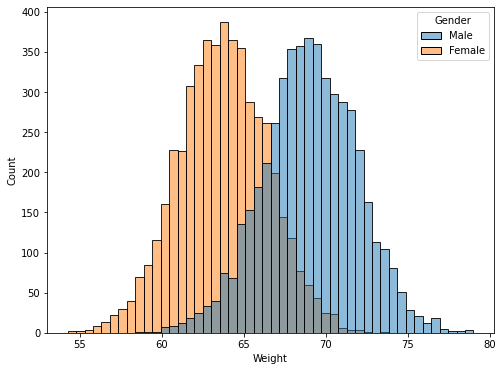

In [9]:
sns.histplot(data=data, x="Weight", hue="Gender")

In [10]:
average_male_weight = data.query("Gender=='Male'")["Weight"].mean()
average_female_weight = data.query("Gender=='Female'")["Weight"].mean()

print(f"""The average weight for:
male:   {average_male_weight:.2f} kg, 
female: {average_female_weight:.2f} kg""")

The average weight for:
male:   69.03 kg, 
female: 63.71 kg


## Correlation between height and weight
- **Question**: Is their any correlation between Height and Weight?

<AxesSubplot:xlabel='Weight', ylabel='Height'>

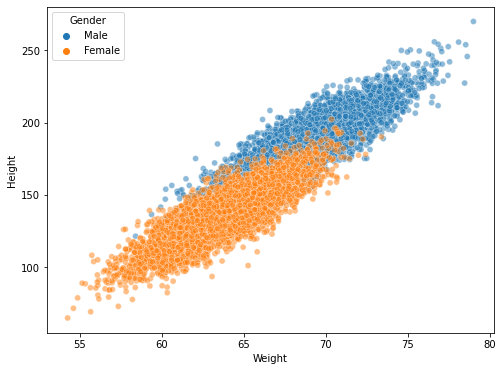

In [17]:
sns.scatterplot(data=data, x="Weight", y="Height", hue="Gender", alpha=.5)

- Calculate the Pearson's correlation coefficient between the Height and Weight
- **Question**: Based on the calculated correlation coefficient value, is there a relationship between Height and Weight in this dataset?

| r    | Interpretation                  |
|------|---------------------------------|
| -1.0 | a perfect negative relationship |
| 0.0  | no relationship                 |
| 1.0  | a perfect positive relationship |

In [32]:
male_data = data.query("Gender=='Male'")
corr, _ = pearsonr(male_data["Weight"], male_data["Height"])
print('Pearsons correlation, r: %.3f' % corr)

Pearsons correlation, r: 0.863


## Fitting a linear model towards the height and weight data

In [26]:
lm = LinearRegression()
male_data = data.query("Gender=='Male'")
X = male_data[["Weight"]]
y = male_data["Height"]
model = lm.fit(X, y)

print(model)

LinearRegression()
